In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_fuml_salary_18-19')

In [3]:
qbs.dtypes

NAME          object
FUML           int64
FUML_rank    float64
salary         int64
dtype: object

In [4]:
qbs.head()

,NAME,FUML,FUML_rank,salary
0,Colt McCoy,0,8.5,3250000
1,Chase Daniel,0,8.5,5000000
2,Josh McCown,0,8.5,10000000
3,Teddy Bridgewater,0,8.5,6000000
4,Andy Dalton,0,8.5,16000000


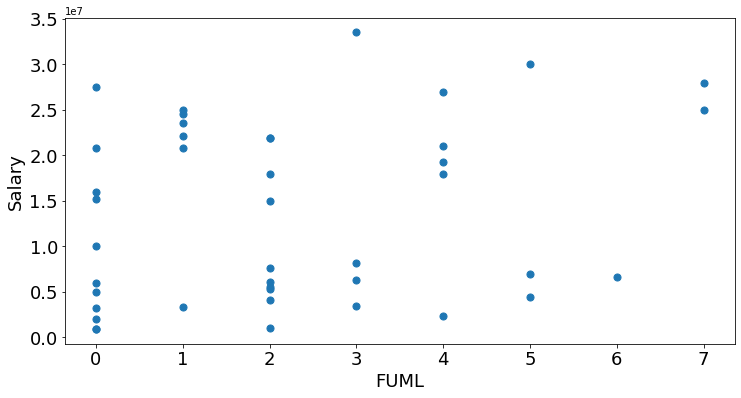

In [5]:
ax = qbs.plot(kind="scatter", x = 'FUML',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUML', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['FUML', 'salary']])

In [7]:
X.mean(axis = 0)

array([-1.05735526e-16, -7.40148683e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.27905438,  1.19271163],
       [ 0.0600495 , -0.8629141 ],
       [-0.61250491,  0.75211207],
       [ 1.40515833, -0.88143448],
       [-1.05386875, -1.00339814]])

In [11]:
km.predict(X)

array([4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0],
      dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,FUML,FUML_rank,salary,clusters
0,Colt McCoy,0,8.5,3250000,4
1,Chase Daniel,0,8.5,5000000,4
2,Josh McCown,0,8.5,10000000,4
3,Teddy Bridgewater,0,8.5,6000000,4
4,Andy Dalton,0,8.5,16000000,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[4.75000000e+00, 2.52187500e+07],
       [2.33333333e+00, 5.28481044e+06],
       [1.00000000e+00, 2.09461410e+07],
       [5.00000000e+00, 5.10521350e+06],
       [1.25000000e-01, 3.92250000e+06]])

In [14]:
qbs.groupby('clusters')[['FUML', 'salary']].mean()

,FUML,salary
clusters,,
0,4.750000,2.521875e+07
1,2.333333,5.284810e+06
2,1.000000,2.094614e+07
3,5.000000,5.105214e+06
4,0.125000,3.922500e+06


In [15]:
centroids = qbs.groupby('clusters')[['FUML', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

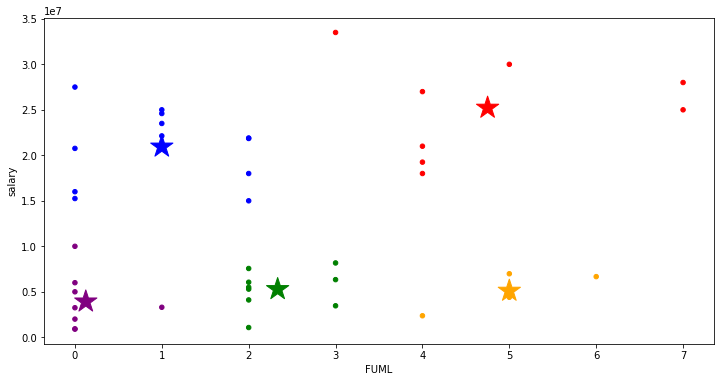

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'FUML', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUML', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

12.62161379399671

In [18]:
silhouette_score(X, km.labels_)

0.5178810421591296